# K-NEAREST NEIGHBOURS

#### The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets
#### Dataset: Need to Classify the animal type


### 1. Analyse the data using the visualizations

In [1]:
#import pandas,numpy and warnings library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load the csv file
df = pd.read_csv("Zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
#Find the shape of the dataset
df.shape

(101, 18)

In [5]:
#Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
#check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [7]:
#Get the dataset summary
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# split numerical and categorical data
num_cols = df.select_dtypes(include=['number']).columns
#Select categorical columns
cat_cols = df.select_dtypes(include=['object','bool']).columns

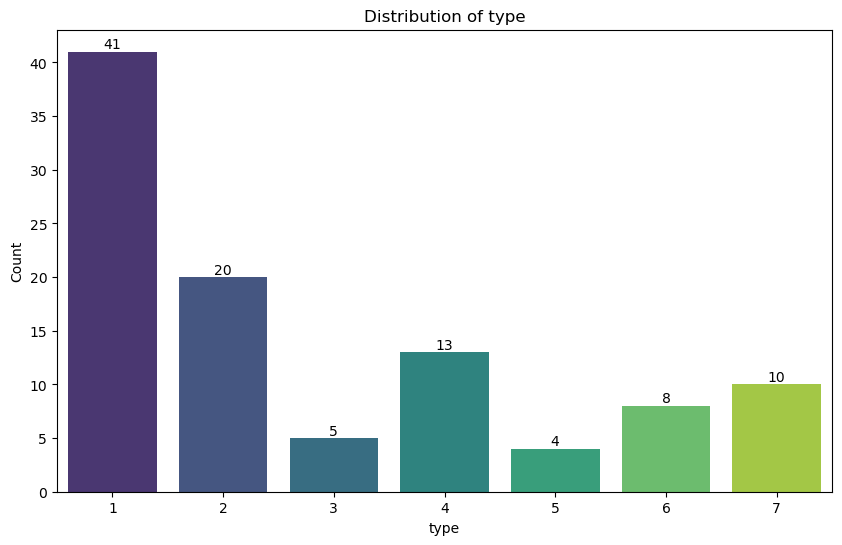

In [11]:
#Count plot
target_col='type'

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x=target_col, palette='viridis')
# Add counts above bars
for container in ax.containers:
    ax.bar_label(container)
plt.title(f'Distribution of {target_col}')
plt.xlabel(target_col)
plt.ylabel('Count')
plt.show()

### 2. Preprocess the data by handling missing values & Outliers, if any.

In [12]:
#Check for null values
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

<Axes: >

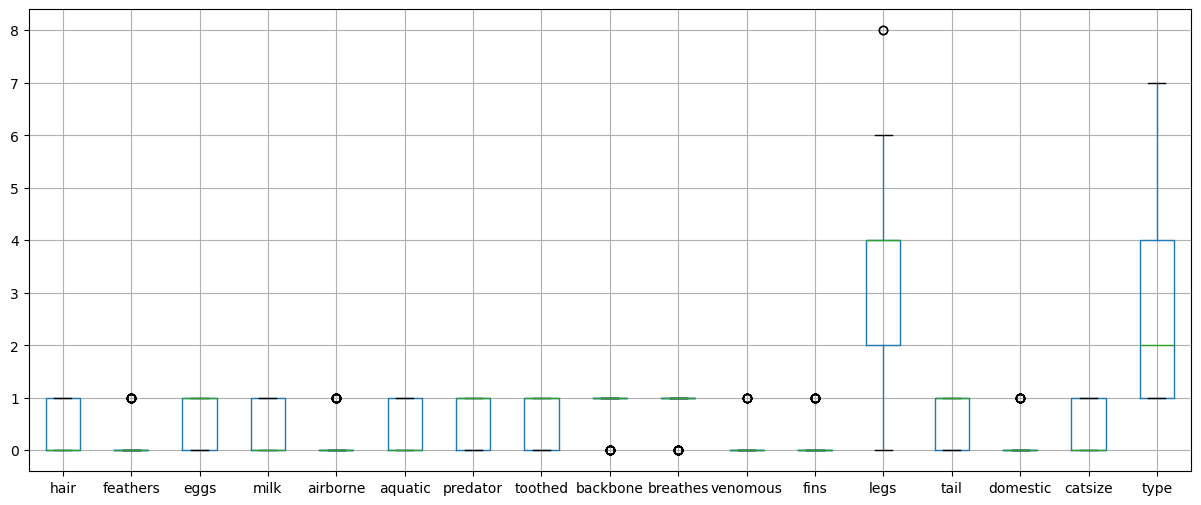

In [13]:
#Check for outliers
plt.figure(figsize=(15, 6))
df.boxplot()

In [14]:
#Outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x> upper_extreme else x) 
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

<Axes: >

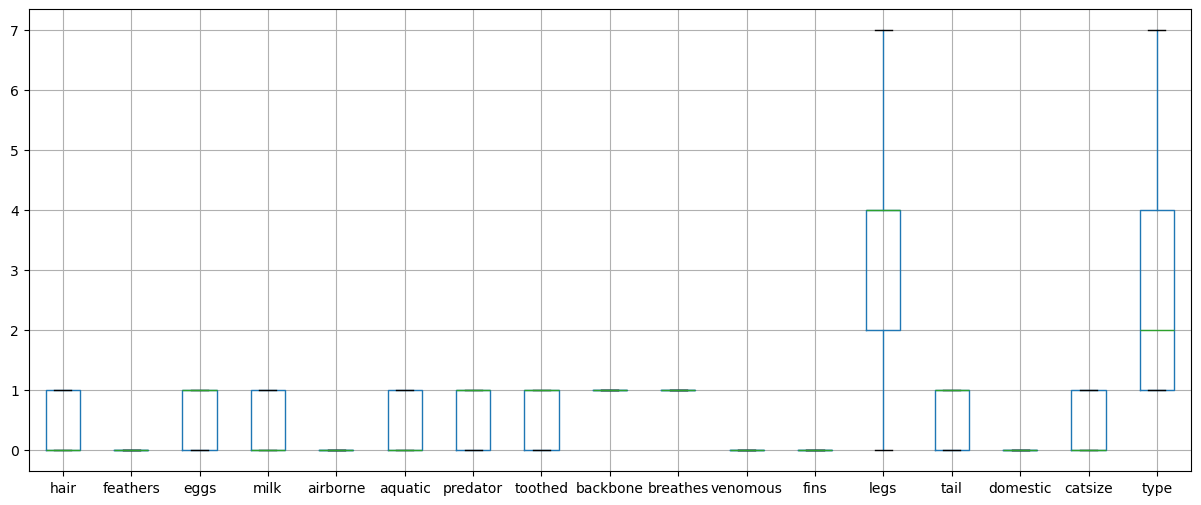

In [16]:
#Check for outliers after capping
plt.figure(figsize=(15, 6))
df.boxplot()

In [18]:
#split target and features
target=df['type']
# drop the animal name column and target column
features=df.drop(columns=['animal name','type'])

In [19]:
#import standard scalar
from sklearn.preprocessing import StandardScaler

#List the numerical columns for encode
numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
features[numerical_cols] = scaler.fit_transform(features[numerical_cols])
features.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,0.896421,0.809776,0.0,0.0,0.0,0.0,0.595939,-1.698416,0.0,1.138180
1,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,-1.115547,0.809776,0.0,0.0,0.0,0.0,0.595939,0.588784,0.0,1.138180
2,-0.861034,0.0,0.843721,-0.826640,0.0,1.343710,0.896421,0.809776,0.0,0.0,0.0,0.0,-1.427250,0.588784,0.0,-0.878595
3,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,0.896421,0.809776,0.0,0.0,0.0,0.0,0.595939,-1.698416,0.0,1.138180
4,1.161395,0.0,-1.185227,1.209717,0.0,-0.744208,0.896421,0.809776,0.0,0.0,0.0,0.0,0.595939,0.588784,0.0,1.138180


### 3. Split the dataset into training and testing sets (80% training, 20% testing).

In [20]:
# Import the train_test_split function to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

In [21]:
#Split the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 16)
(21, 16)
(80,)
(21,)


### 4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [22]:
#import KNeighborsClassifier library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [26]:
#Build the KNeighborsClassifier model
knn = KNeighborsClassifier()
display(knn)
#Train the knn model
knn.fit(x_train,y_train)
#Predict and evaluate
y_pred=knn.predict(x_test)
accurecay=accuracy_score(y_test,y_pred)
print("accuracy:",accurecay)

KNeighborsClassifier()

accuracy: 0.9523809523809523


### 5. Choose an appropriate distance metric and value for K.

In [27]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [30]:
#set gridsearch parameters
params = {
    'n_neighbors': list(range(1, 21)), # Testing k from 1 to 20
    'metric': ['euclidean', 'manhattan','Minkowski'] # Testing 'euclidean' and 'manhattan' distances
}

#Apply grid search
knn_grid_search = GridSearchCV(estimator=knn, param_grid=params, cv=5, scoring='accuracy')

#Train the model
knn_grid_search.fit(x_train,y_train)

#Get the best parameter
best_params = knn_grid_search.best_params_
print("Best Params:",best_params)
#KNN best estimator
knn_tune = knn_grid_search.best_estimator_

#Predict 
y_pred_tune = knn_tune.predict(x_test)

#Check accuracy
accuracyTune = accuracy_score(y_test, y_pred_tune)
print("accuracy after tuning:",accuracyTune)

Best Params: {'metric': 'euclidean', 'n_neighbors': 1}
accuracy after tuning: 0.9523809523809523


### 6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [31]:
#import accuracy, precision, recall, F1-score, and ROC-AUC score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [32]:
#Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_tune)
precision = precision_score(y_test, y_pred_tune, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_tune, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_tune, average='weighted', zero_division=0)

print("Performance metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Performance metrics:
Accuracy: 0.9524
Precision: 0.9206
Recall: 0.9524
F1-Score: 0.9333


### 7. Visualize the decision boundaries of the classifier.

In [34]:
#import PCA library
from sklearn.decomposition import PCA

In [35]:
#Fit PCA on training data with 2 components 
pca=PCA(n_components=2)
pca.fit(x_train)

PCA(n_components=2)

In [36]:
# Transform train and test sets
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train_pca.shape)
print(x_test_pca.shape)

(80, 2)
(21, 2)


In [37]:
#train the knn model with pca data
knn_pca = KNeighborsClassifier(n_neighbors=1,metric='euclidean')
display(knn_pca)
knn_pca.fit(x_train_pca,y_train)

#Predict and evaluate
y_pred_pca=knn_pca.predict(x_test_pca)
accuracy_score(y_test,y_pred_pca)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

0.9047619047619048

In [39]:
# Define grid for decision boundary
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

In [40]:
#Predict on the Grid 
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


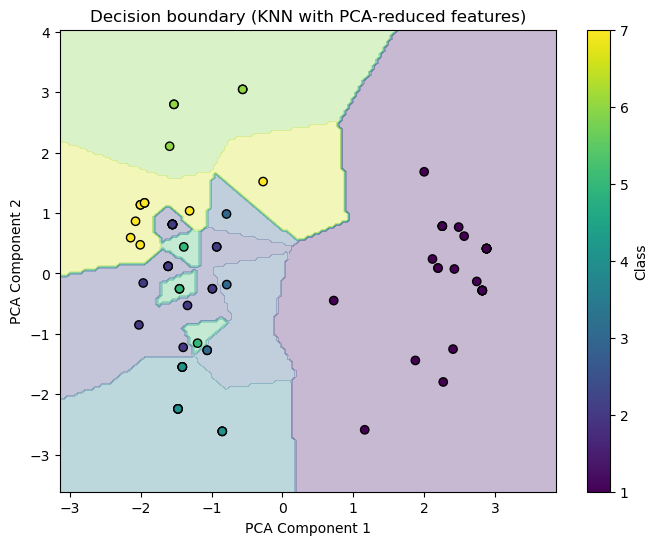

In [41]:
# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, edgecolor='k')
plt.title("Decision boundary (KNN with PCA-reduced features)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Class')
plt.show()

## Interview Questions:

### 1. What are the key hyperparameters in KNN?

#### **Hyperparameters in KNN:**
**1.Number of Neighbors (k):**
- Defines how many nearest points are considered for classification/regression.

- Small k - more sensitive to noise, risk of overfitting.

- Large k - smoother boundaries, risk of underfitting.

- Often chosen via cross-validation.

**2. Distance Metric:**
- Determines how “closeness” is measured between points.

- Common choices:

    - Euclidean distance (default, continuous data).

    - Manhattan distance (grid-like data).

    - Minkowski distance (generalization of Euclidean/Manhattan).

    - Cosine similarity (text/high-dimensional vectors).

    - Hamming distance (categorical/binary data).

**3. Weighting Scheme:**
- Controls how neighbors contribute to the prediction.

- Options:

    - Uniform - all neighbors have equal weight.

    - Distance-based - closer neighbors have more influence.

    - Distance weighting often improves performance when classes overlap.

**4. Algorithm Choice:**
- Determines how neighbors are searched:

- Brute force - checks all points (slow for large datasets).

- KD-Tree / Ball-Tree - faster for medium-sized datasets with fewer dimensions.

- Auto - lets scikit-learn choose the best method.

**5. Leaf Size (for tree-based search):**
- Affects speed and memory usage when using KD-Tree or Ball-Tree.

- Default is 30; tuning can optimize performance.

**6. p (Minkowski Parameter):**
- Defines the power parameter for Minkowski distance.

    - 𝑝=1 - Manhattan, 
    - 𝑝=2 - Euclidean.

- Allows flexibility in distance measurement.

### 2. What distance metrics can be used in KNN?

#### **Distance metrics in KNN:**
- **Euclidean Distance (L2 Norm):**
    Description: The most commonly used distance. It calculates the straight-line distance between two points in Euclidean space. It's suitable for continuous, numerical data where the differences between dimensions are equally important.

- **Manhattan Distance (L1 Norm):**
    Description: Also known as city block distance or taxicab distance. It calculates the sum of the absolute differences between the coordinates of two points. It's less sensitive to outliers than Euclidean distance and is often preferred when working with features that have different scales or when movement is restricted to a grid (like navigating city blocks).

- **Minkowski Distance:**
    Description: A generalization of Euclidean and Manhattan distances. It takes an additional parameter p:
If p=1, it becomes Manhattan distance.
If p=2, it becomes Euclidean distance.
It's a flexible metric that can be adjusted based on the data's characteristics.

- **Chebyshev Distance (L-infinity Norm):**
    Description: Measures the maximum absolute difference between any single coordinate of two points. It's useful when you want to consider the largest difference across any dimension as the primary measure of dissimilarity.

- **Hamming Distance:**
    Description: Primarily used for binary or categorical data. It counts the number of positions at which the corresponding bits (or categories) are different between two strings of equal length. For example, the Hamming distance between '1011101' and '1001001' is 2.

- **Cosine Similarity (and Cosine Distance):**
    Description: Measures the cosine of the angle between two non-zero vectors. It's a measure of orientation rather than magnitude. Often used in high-dimensional spaces, such as text analysis, where the magnitude of feature vectors is less important than their direction.

- **Jaccard Distance:**
    Description: Used for comparing the similarity and diversity of sample sets. It's often applied to binary data or set-like data, for example, comparing document similarity based on word presence.